# 📊 Campaign Effectiveness Analysis
## Logistic Regression Model

**Objective:**
- Analyze customer behavior in an email marketing campaign.
- Predict whether a customer will click on an email.
- Use Logistic Regression for classification.

**Dataset Features:**
- `Email Opened`: Whether the email was opened (0 = No, 1 = Yes).
- `Email Clicked`: Whether the email was clicked (Target Variable: 0 = No, 1 = Yes).
- `Discount Offered`: Percentage of discount offered in the campaign.
- `Age`: Age of the customer.
- `Location`: Categorical variable representing customer’s location.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load dataset
df = pd.read_csv("../datasets/marketing-campaigns.csv")

# Display first few rows
df.head()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


### 🔍 Exploratory Data Analysis (EDA)
Check Data Summary

In [35]:
# Display dataset information
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer id         20 non-null     int64 
 1   Age                 20 non-null     int64 
 2   Gender              20 non-null     int64 
 3   Location            20 non-null     object
 4   Email Opened        20 non-null     int64 
 5   Email Clicked       20 non-null     int64 
 6   Product page visit  20 non-null     int64 
 7   Discount offered    20 non-null     int64 
 8   Purchased           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


Customer id           0
Age                   0
Gender                0
Location              0
Email Opened          0
Email Clicked         0
Product page visit    0
Discount offered      0
Purchased             0
dtype: int64

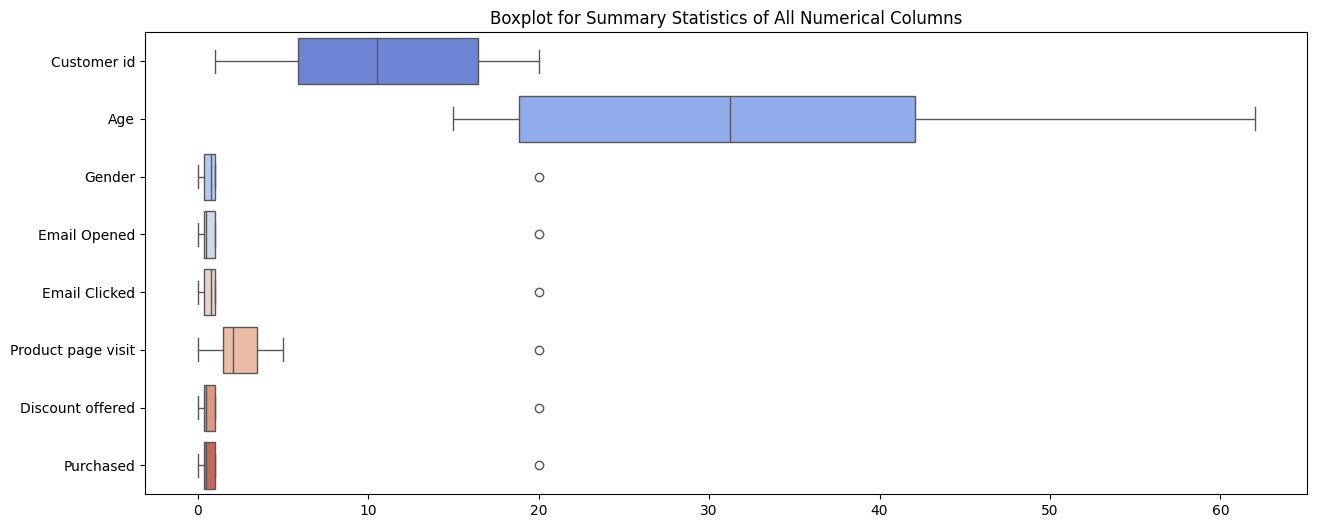

In [36]:
# Set figure size
plt.figure(figsize=(15, 6))

# Create a boxplot for all numerical columns
sns.boxplot(data=df.describe(), orient="h", palette="coolwarm")

# Set title
plt.title("Boxplot for Summary Statistics of All Numerical Columns")

# Show plot
plt.show()

### 📈 Visualizing Data
Distribution of Email Clicks

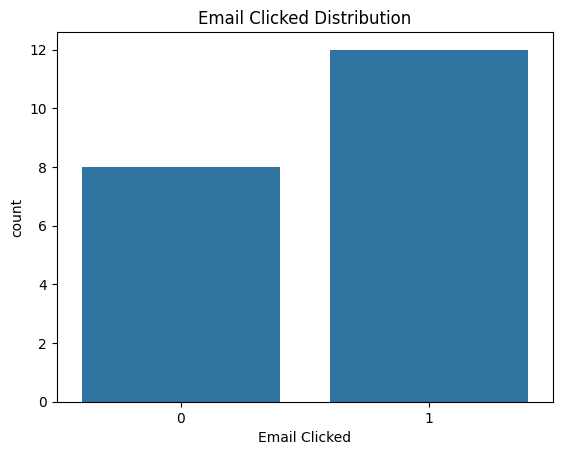

In [37]:
sns.countplot(x='Email Clicked', data=df)
plt.title("Email Clicked Distribution")
plt.show()

Correlation Analysis

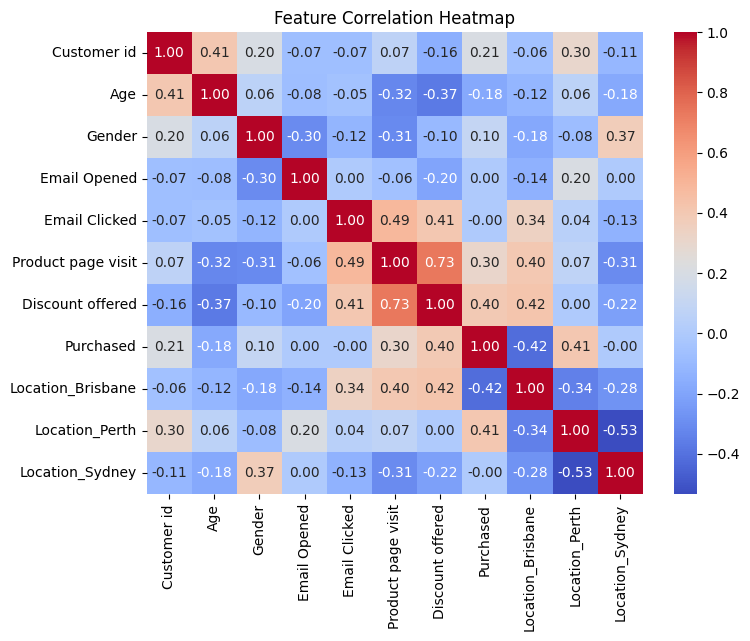

In [38]:
# Convert categorical columns to numerical using one-hot encoding
df_numeric = pd.get_dummies(df, drop_first=True)  # Drop first category to avoid multicollinearity

# Plot heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### 🔧 Data Preprocessing
Handle Missing Values and Encode Categorical Data

In [39]:
# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert categorical data using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

### 📏 Feature Scaling

In [40]:
# Select numerical features
numerical_features = ['Age', 'Discount offered']

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check transformed dataset
print(df.head())


   Customer id       Age  Gender  Email Opened  Email Clicked  \
0            1 -1.083845       0             1              1   
1            2  1.117194       0             1              0   
2            3 -1.550732       1             0              1   
3            4 -0.883751       0             1              1   
4            5 -0.150071       1             0              1   

   Product page visit  Discount offered  Purchased  Location_Brisbane  \
0                   3               1.0          1              False   
1                   0              -1.0          0              False   
2                   2               1.0          1              False   
3                   5               1.0          0               True   
4                   1               1.0          0               True   

   Location_Perth  Location_Sydney  
0            True            False  
1           False            False  
2           False             True  
3           False     

### 🎯 Model Training
Split data into train and test data

In [ ]:
# Define feature variables (X) and target variable (y)
X = df.drop("Email Clicked", axis=1)
y = df["Email Clicked"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (16, 10)
Test set size: (4, 10)


Index(['Customer id', 'Age', 'Gender', 'Email Opened', 'Product page visit',
       'Discount offered', 'Purchased', 'Location_Brisbane', 'Location_Perth',
       'Location_Sydney'],
      dtype='object')

Train the model

In [42]:
# Initialize logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)

# Train model
model.fit(X_train, y_train)

# Model coefficients
coefficients = model.coef_.flatten()

# Construct equation string
equation = "P(Y = 1) = 1 / (1 + exp(-(" + " + ".join([f"{coeff:.5f} * {col}" for coeff, col in zip(coefficients, X_train.columns)]) + ")))"

# Print the equation
print("Logistic Regression Equation:\n", equation)



Logistic Regression Equation:
 P(Y = 1) = 1 / (1 + exp(-(-0.02348 * Customer id + 0.51774 * Age + -0.10246 * Gender + 0.50984 * Email Opened + 0.50011 * Product page visit + 0.19514 * Discount offered + -0.49035 * Purchased + 0.39788 * Location_Brisbane + -0.14375 * Location_Perth + 0.15044 * Location_Sydney)))


### 📊 Model Evaluation
Making predictions and evaluating model

In [43]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.50
Precision: 0.33
Recall: 1.00
F1-Score: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



Seeing model performance

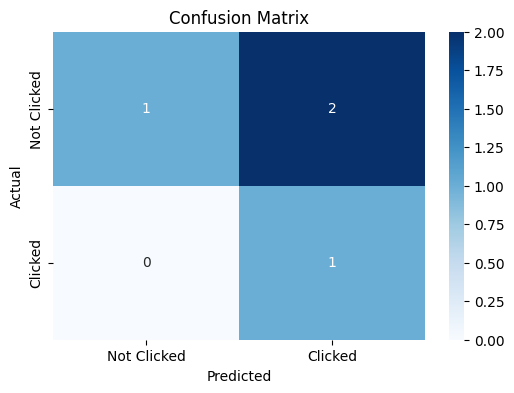

In [44]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Clicked", "Clicked"], yticklabels=["Not Clicked", "Clicked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### 📈 ROC Curve and AUC Score

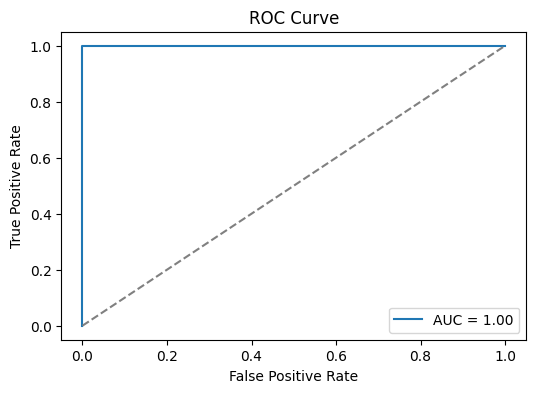

In [45]:
# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Feature Importance analysis

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13908\3263433939.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


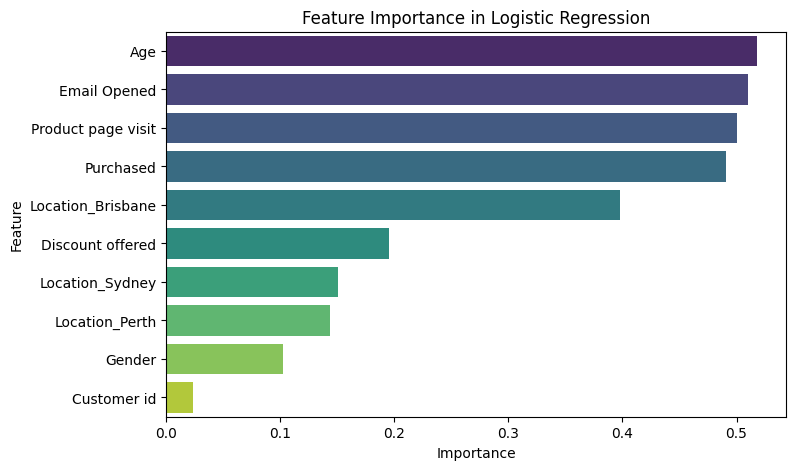

In [46]:
# Feature importance based on model coefficients
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": np.abs(model.coef_)[0]})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance in Logistic Regression")
plt.show()
